In [ ]:
# Equipo 4

# Diego Hernandez Alanis
# Andres Anguian
# Valeria Carillo
# Ronaldo Lopez
# José Cárdenas

In [29]:
# Parámetros de la simulación
population_size = 1000
initial_infected = 2
days = 30
simulations = 100
vaccinations_per_day = 3
min_days_infected = 14
death_prob = 0.01
recovery_prob = 0.2

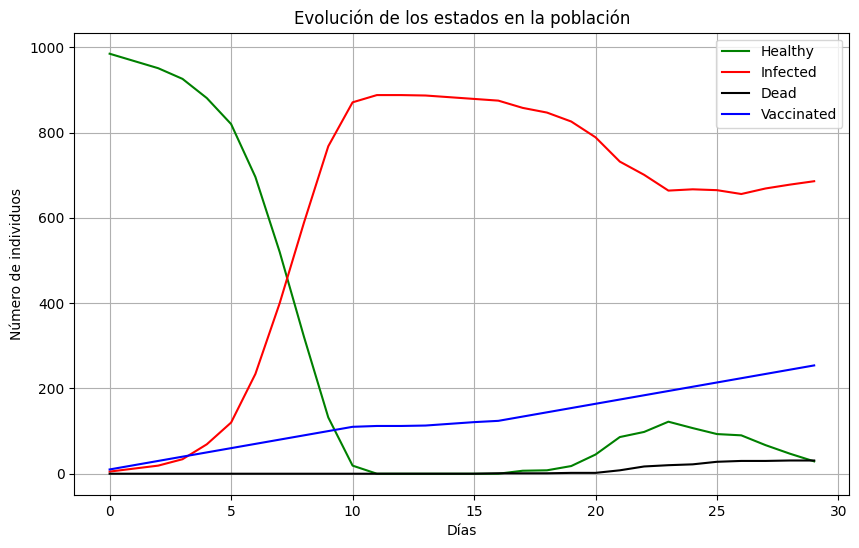

In [30]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Definiendo la clase de la población
# Se contempla la población inicial y los estados que contempla
class Population:
    def __init__(self, size, initial_infected):
        self.size = size
        self.states = {
            'Healthy': size - initial_infected,
            'Infected': initial_infected,
            'Dead': 0,
            'Vaccinated': 0
        }
        self.infected_days = [0] * initial_infected  # Días de infección para infectados iniciales

  # Función: Simulación de infectados
    def infect(self):
        """Infectar nuevos individuos sanos."""
        new_infections = np.random.binomial(self.states['Healthy'], self.states['Infected'] / self.size)
        self.states['Healthy'] -= new_infections
        self.states['Infected'] += new_infections
        self.infected_days.extend([0] * new_infections)

  # Función: Actualización de infectados (vacunado o muerto)
    def update_infected(self, min_days_infected, death_prob, recovery_prob):

        recoveries, deaths = 0, 0
        for i in range(len(self.infected_days)):
            self.infected_days[i] += 1
            if self.infected_days[i] >= min_days_infected:
                if random.random() < recovery_prob:
                    recoveries += 1
                elif random.random() < death_prob:
                    deaths += 1

        # Actualizando valores de cada estado
        self.states['Infected'] -= (recoveries + deaths)
        self.states['Healthy'] += recoveries
        self.states['Dead'] += deaths

        # Removiendo infectados, recuperados o muertos
        self.infected_days = [
            days for days in self.infected_days
            if days < min_days_infected or (random.random() >= recovery_prob and random.random() >= death_prob)
        ]

    # Función: Actualizando los vacunados
    def vaccinate(self, vaccinations_per_day):
        """Vacunar individuos saludables."""
        vaccinations = min(vaccinations_per_day, self.states['Healthy'])
        self.states['Healthy'] -= vaccinations
        self.states['Vaccinated'] += vaccinations

    # Función: Visualizando el estado actual
    def get_states(self):
        return self.states

# Clase del Virus
# Simulación de la evolución del Virus
class VirusSimulation:
    def __init__(self, population_size, initial_infected, days, vaccinations_per_day,
                 min_days_infected, death_prob, recovery_prob):
        self.population_size = population_size
        self.initial_infected = initial_infected
        self.days = days
        self.vaccinations_per_day = vaccinations_per_day
        self.min_days_infected = min_days_infected
        self.death_prob = death_prob
        self.recovery_prob = recovery_prob

# Función: Generando simulaciones y registrando la evolución diaria.
    def run_single_simulation(self):
        population = Population(self.population_size, self.initial_infected)
        daily_states = []

        for day in range(self.days):
            population.infect()
            population.update_infected(self.min_days_infected, self.death_prob, self.recovery_prob)
            population.vaccinate(self.vaccinations_per_day)
            daily_states.append(population.get_states().copy())
        return daily_states


# Correr la simulación
simulation = VirusSimulation(
    population_size, initial_infected, days, vaccinations_per_day,
    min_days_infected, death_prob, recovery_prob
)
daily_states = simulation.run_single_simulation()

# Extrayendo datos para el gráfico
days_range = range(days)
healthy = [state['Healthy'] for state in daily_states]
infected = [state['Infected'] for state in daily_states]
dead = [state['Dead'] for state in daily_states]
vaccinated = [state['Vaccinated'] for state in daily_states]

# Graficando los resultados
plt.figure(figsize=(10, 6))
plt.plot(days_range, healthy, label='Healthy', color='green')
plt.plot(days_range, infected, label='Infected', color='red')
plt.plot(days_range, dead, label='Dead', color='black')
plt.plot(days_range, vaccinated, label='Vaccinated', color='blue')

plt.title('Evolución de los estados en la población')
plt.xlabel('Días')
plt.ylabel('Número de individuos')
plt.legend()
plt.grid()
plt.show()
